In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from ic.util import h, HR

In [12]:
def line_chart(dataframes, metric):
    return pd.concat([
        df[[metric]].rename(columns={metric: algorithm}) for (algorithm, df) in dataframes.items() 
    ], axis=1)


def bar_chart(dataframes, metrics):
    return pd.concat([
        pd.DataFrame({ algorithm: df.iloc[-1] }) for (algorithm, df) in dataframes.items()
    ], axis=1).loc[metrics].transpose()


def all_graphs(dataframes, metrics):
    line_charts = dict([
      (metric, line_chart(dataframes, metric)) for metric in metrics  
    ])
    return (line_charts, bar_chart(dataframes, metrics))
        

def show_report(file_name, base_path, algorithms, metrics, figsize=(16, 8)):
    file_name_template = f'{base_path}/{file_name}.pcap_ISCX.processed.$ALGORITHM$.metrics.csv'
    dataframes = dict([
      (algorithm, pd.read_csv(
          file_name_template.replace('$ALGORITHM$', algorithm), 
          index_col='step'
      )) for algorithm in algorithms
    ])
        
    lines, bar = all_graphs(dataframes, metrics)
    
    display(h(1, file_name))
        
    for metric in metrics:
        display(h(2, metric))
        lines[metric].plot.line(figsize=figsize)
        plt.show()
    
    bar.plot.bar(figsize=figsize)
    plt.show()
    
    display(HR)

In [13]:
PATH = '../../data/2022_08_01/metrics'
ALGOS = ['HoeffdingTree', 'Bagging', 'ADWINBagging']
METRICS = ['accuracy', 'recall', 'precision', 'f1']

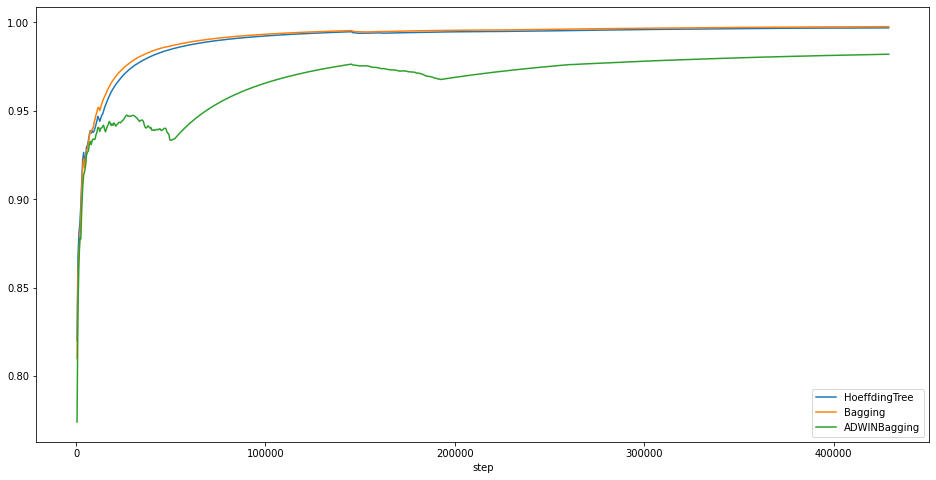

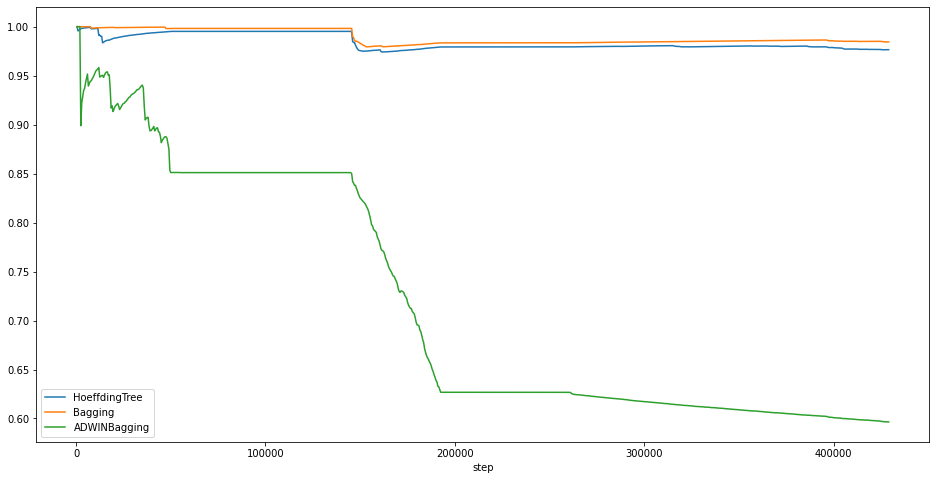

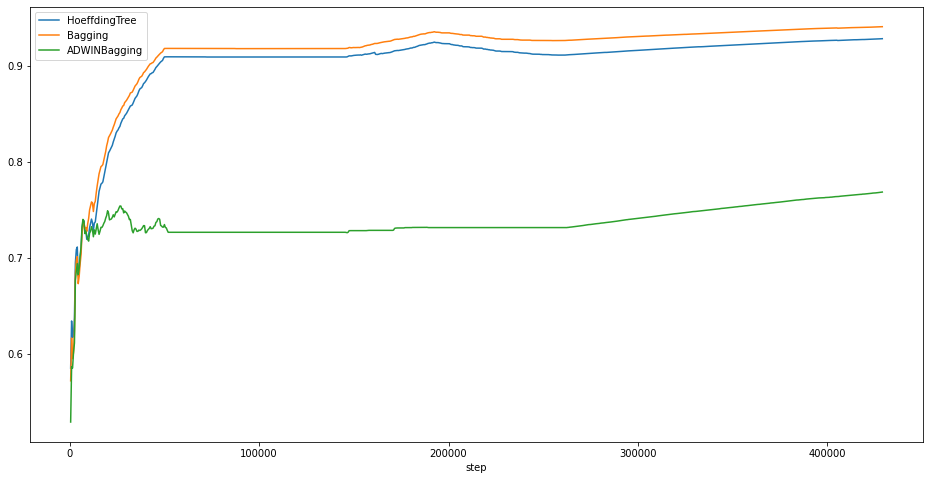

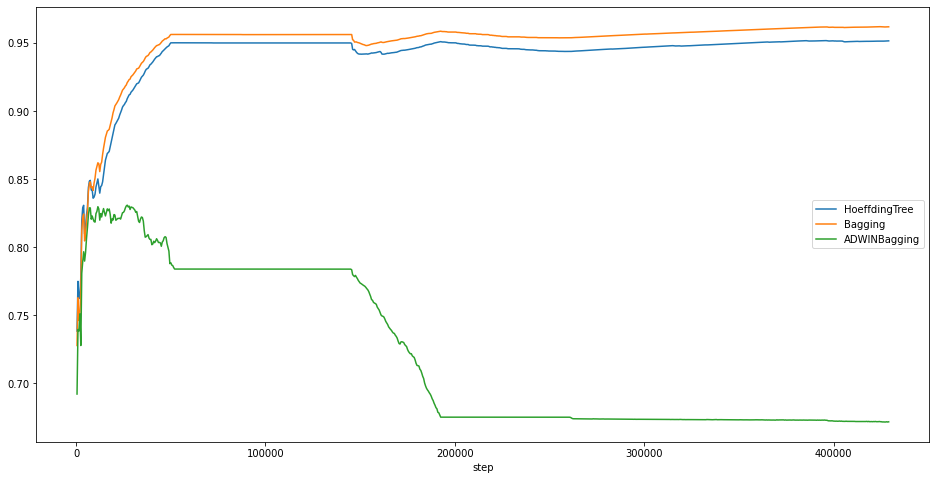

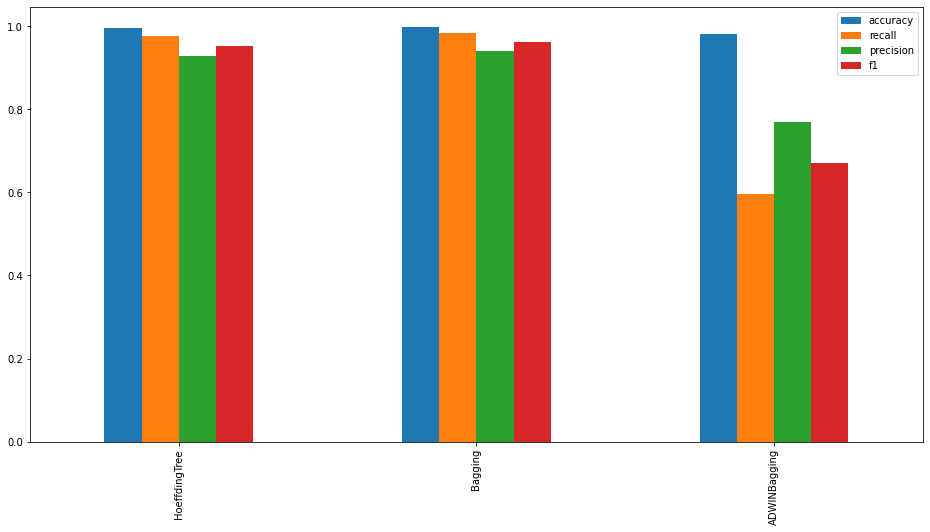

In [14]:
show_report('Tuesday-WorkingHours', PATH, ALGOS, METRICS)

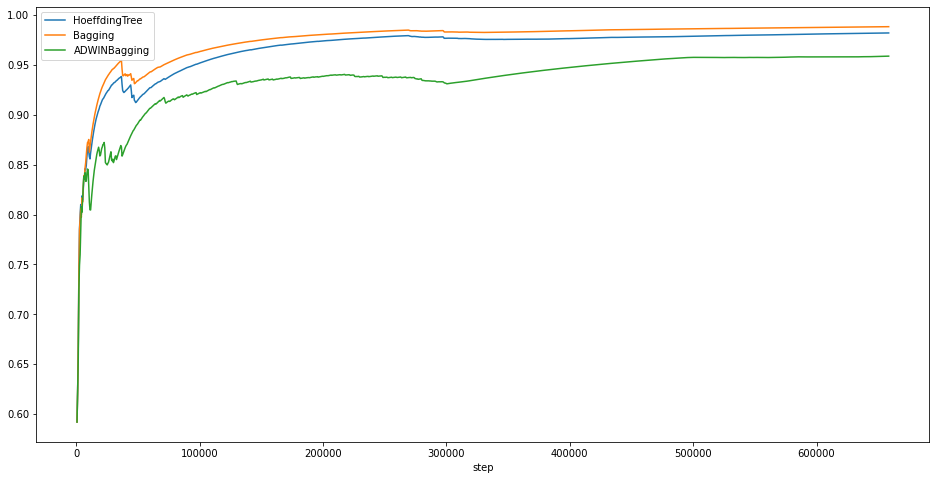

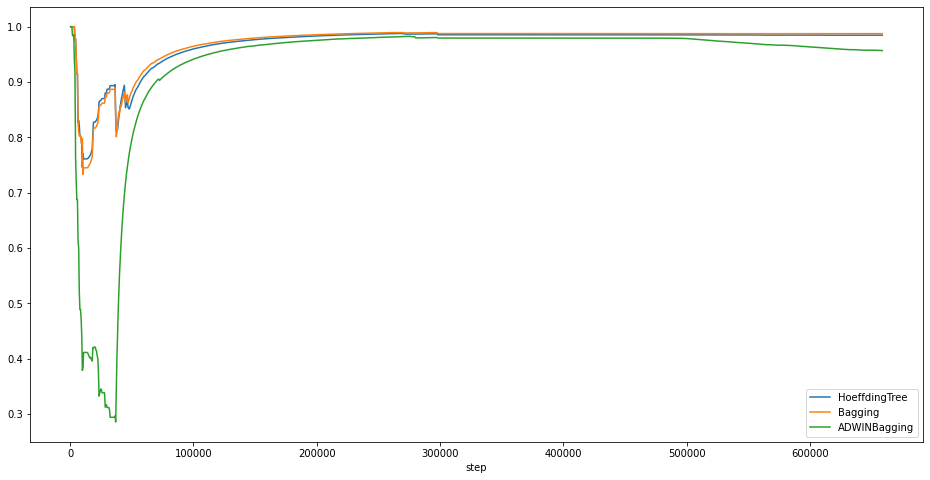

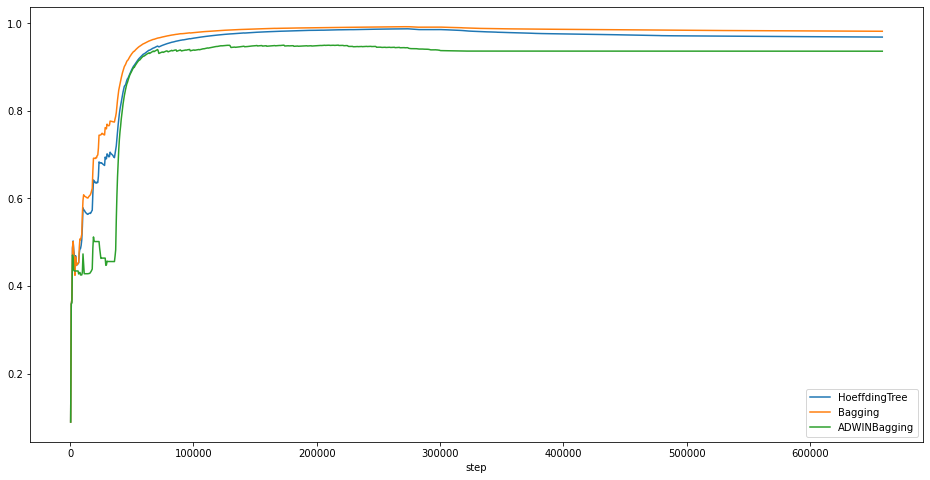

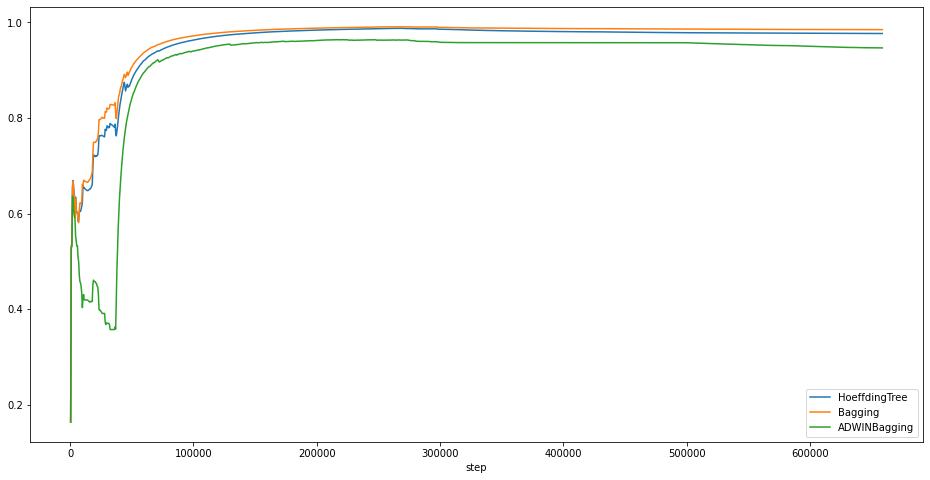

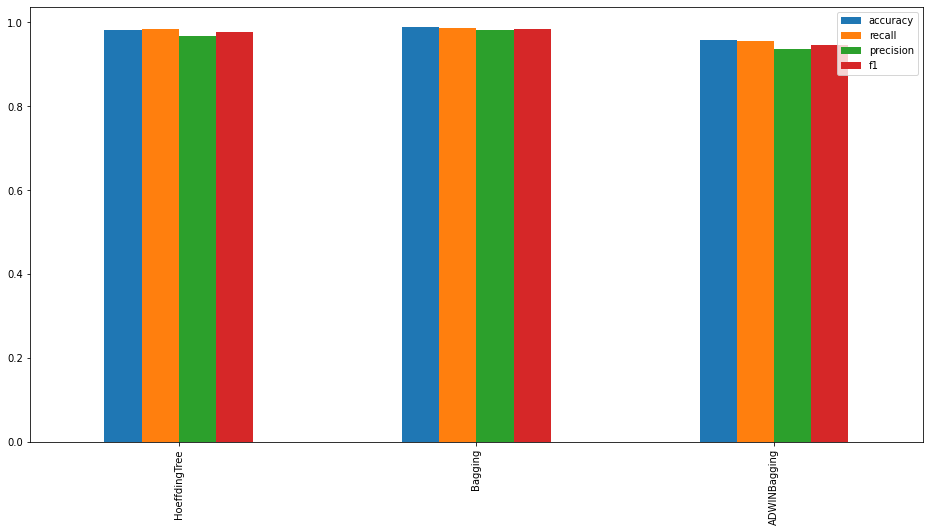

In [15]:
show_report('Wednesday-workingHours', PATH, ALGOS, METRICS)

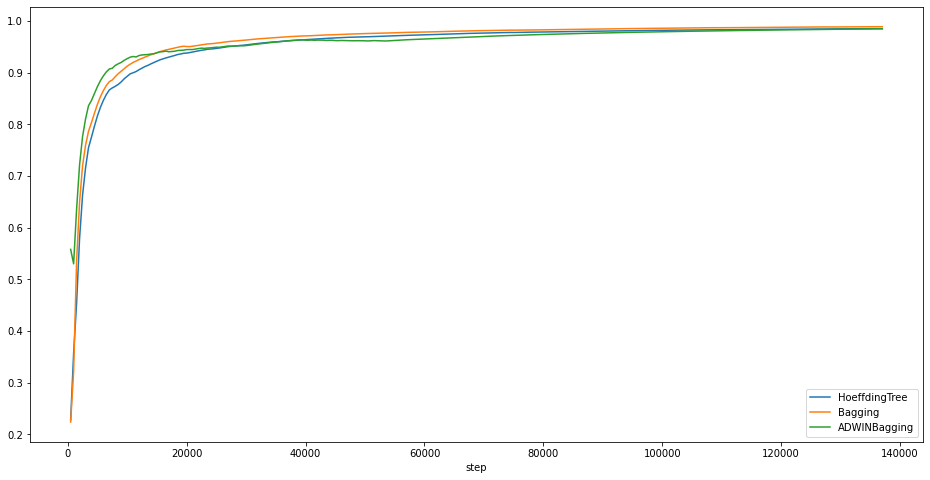

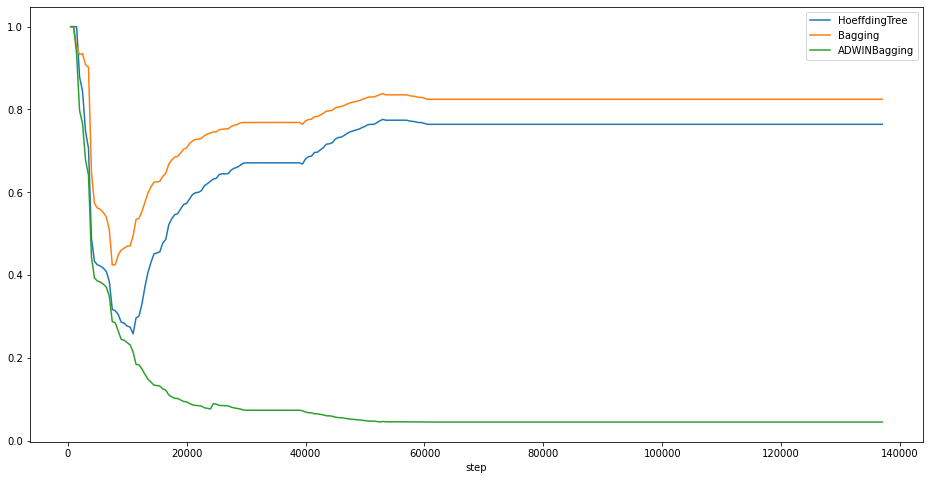

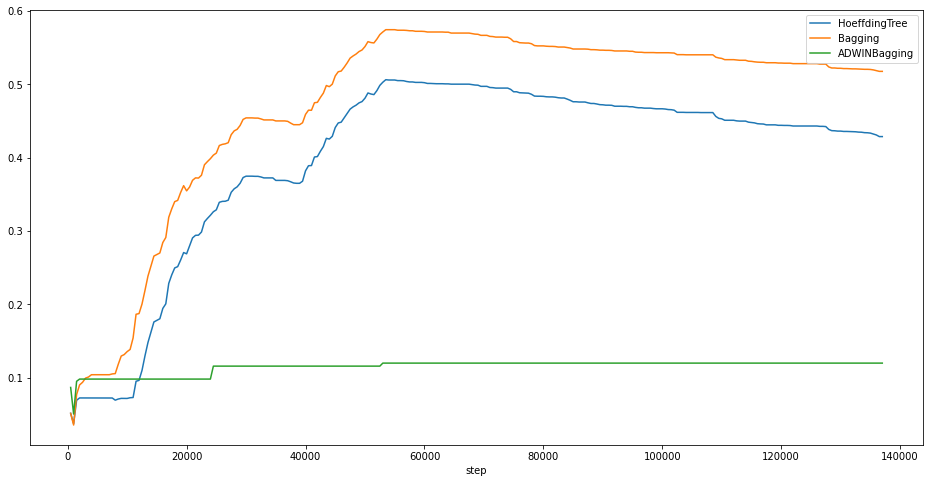

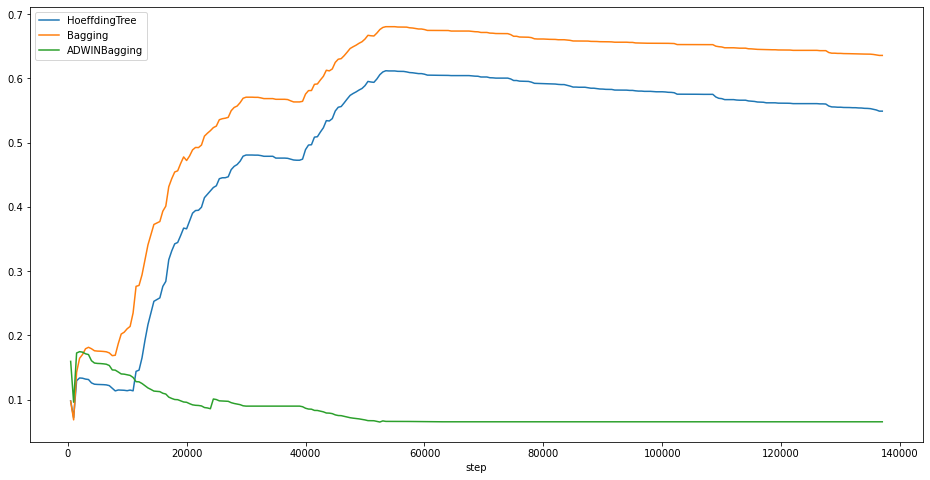

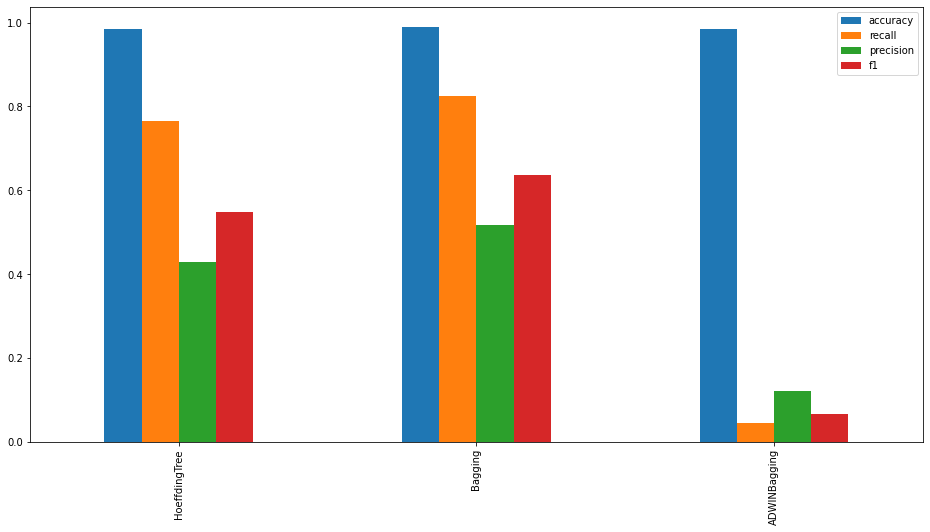

In [16]:
show_report('Thursday-WorkingHours-Morning-WebAttacks', PATH, ALGOS, METRICS)

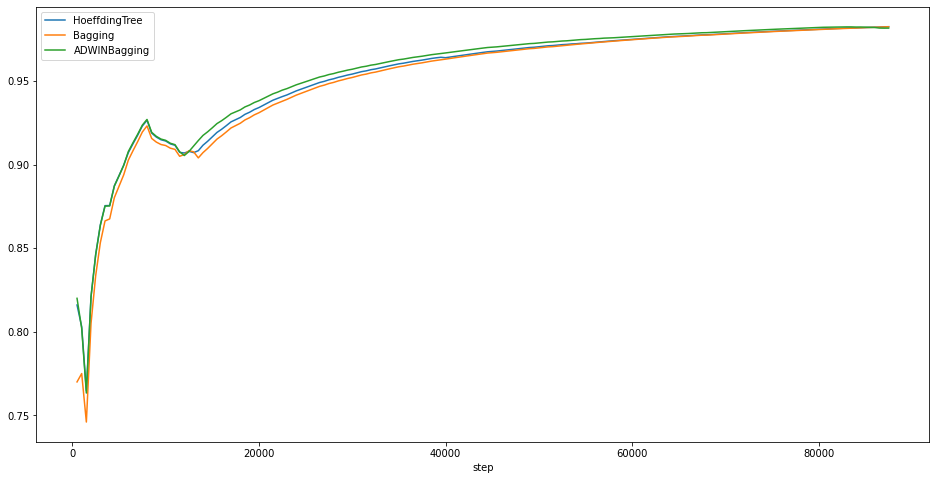

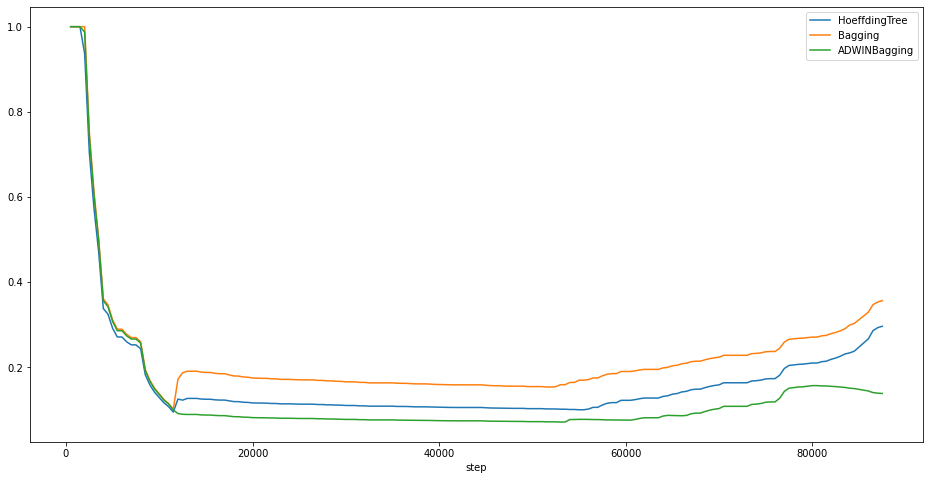

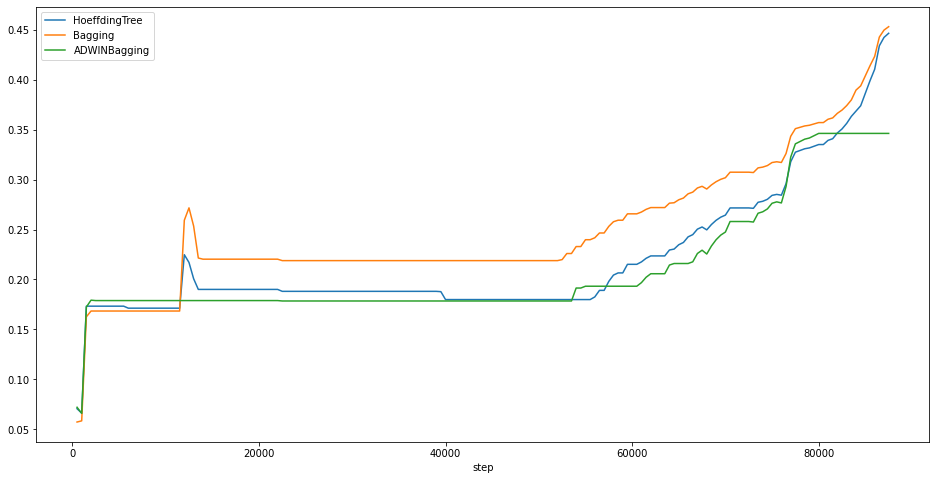

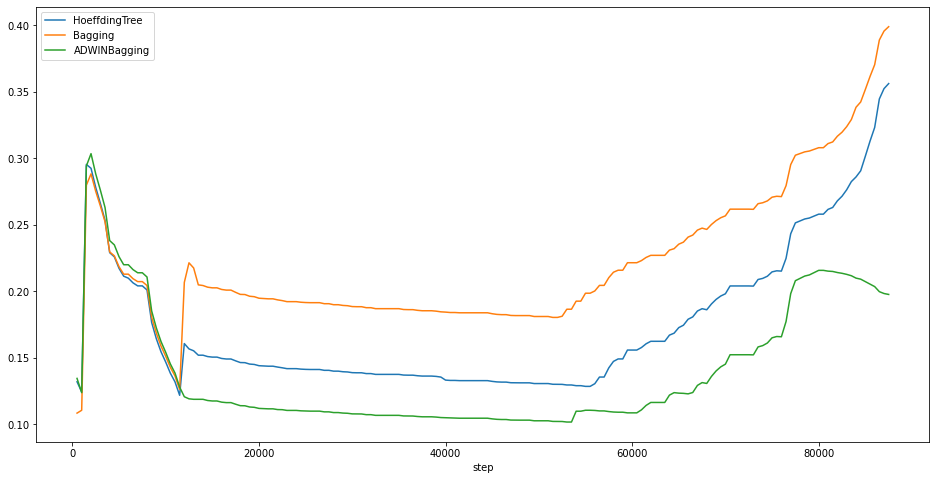

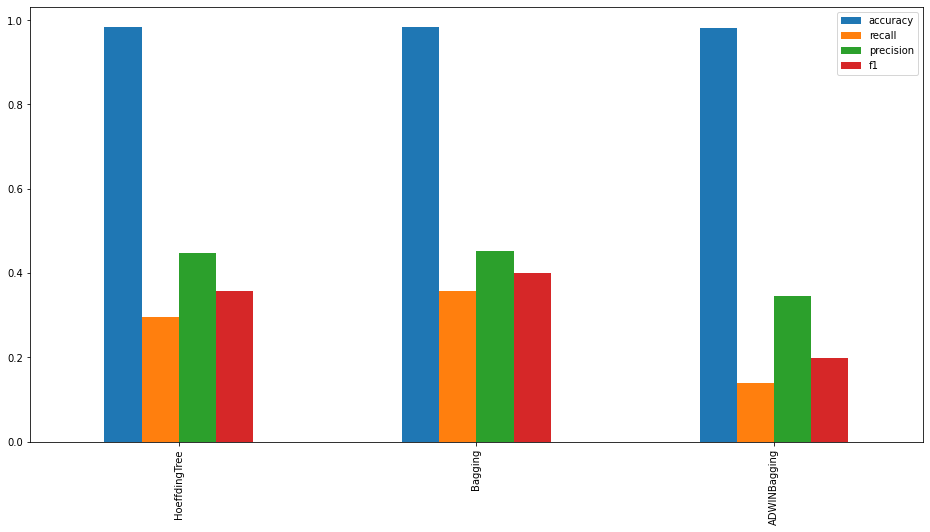

In [17]:
show_report('Friday-WorkingHours-Morning', PATH, ALGOS, METRICS)

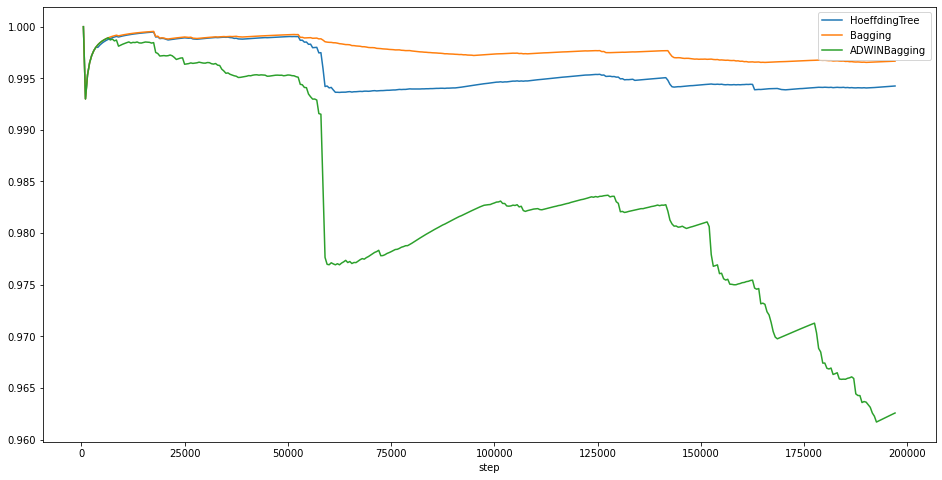

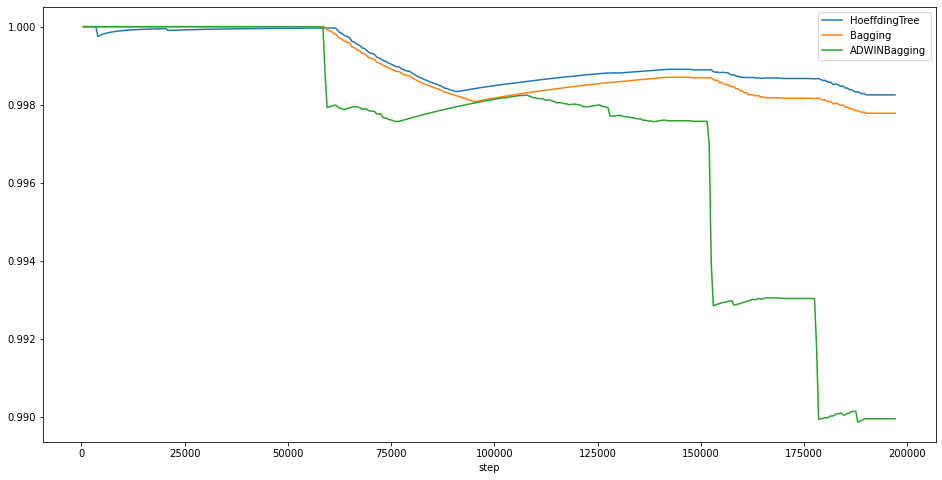

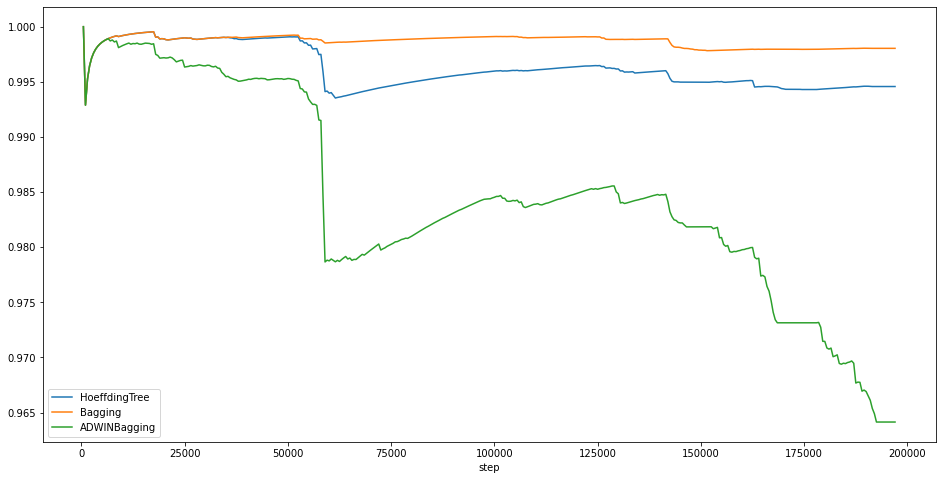

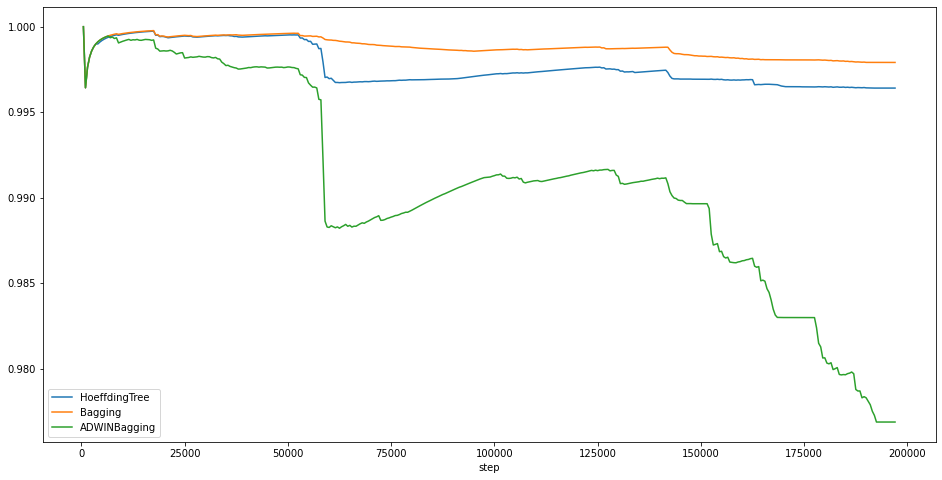

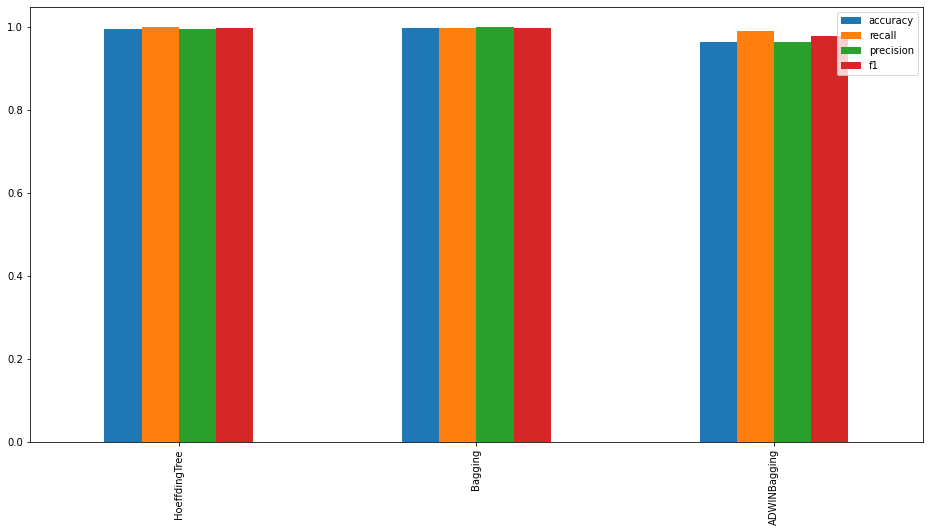

In [18]:
show_report('Friday-WorkingHours-Afternoon-PortScan', PATH, ALGOS, METRICS)

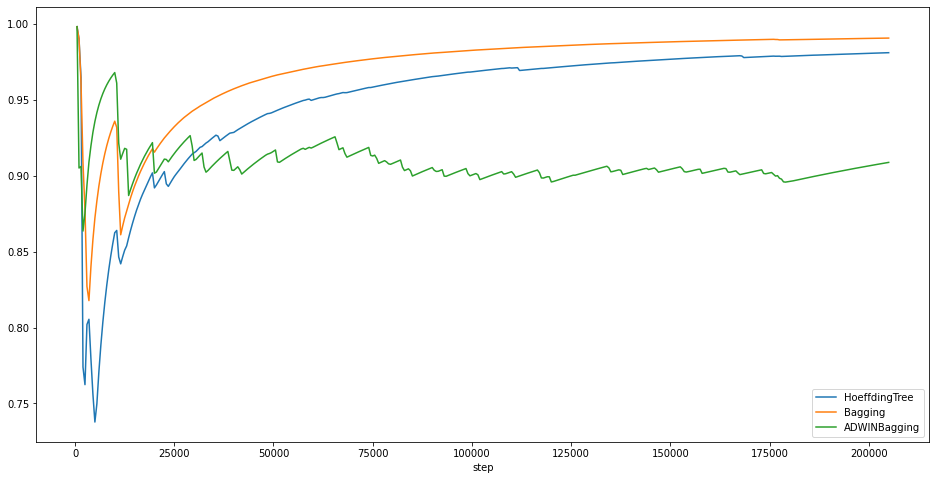

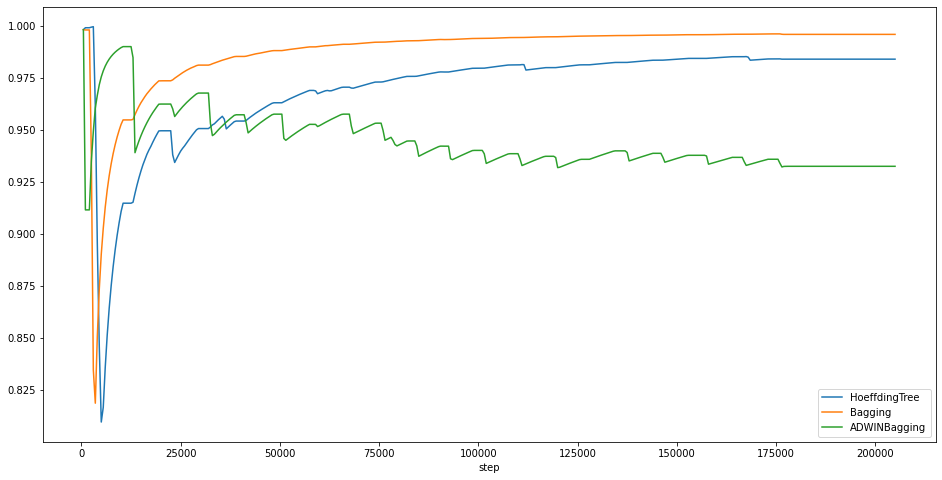

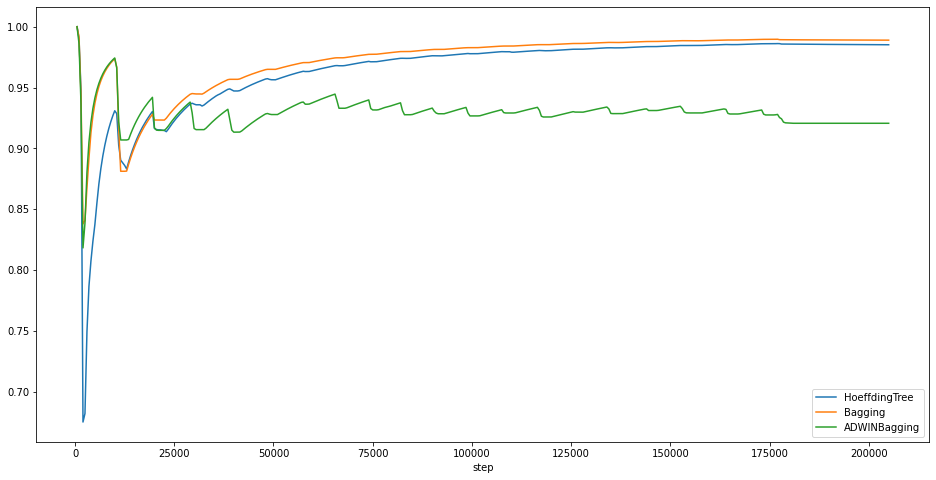

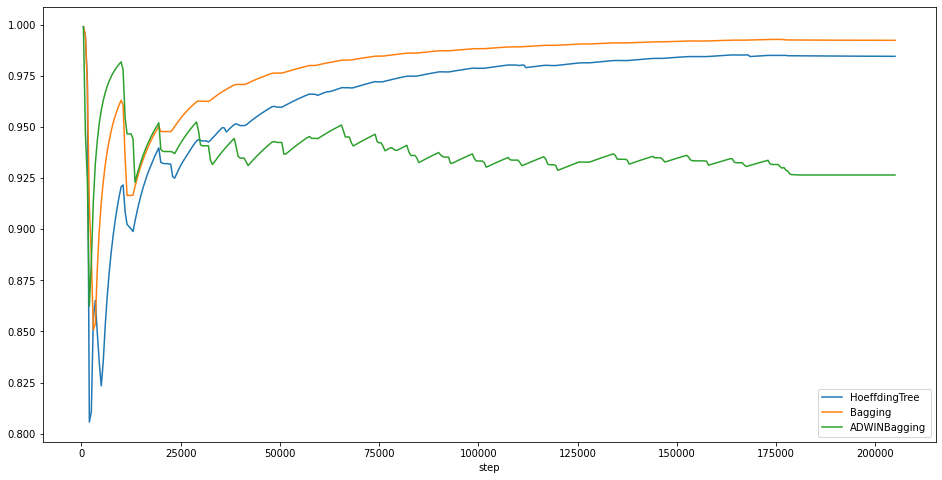

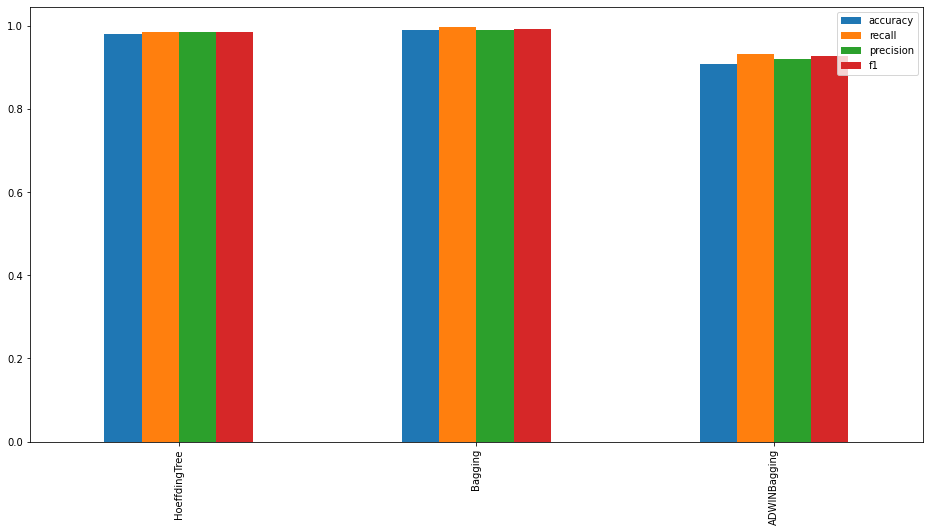

In [19]:
show_report('Friday-WorkingHours-Afternoon-DDos', PATH, ALGOS, METRICS)